In [1]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

Text(0, 0.5, 'y')

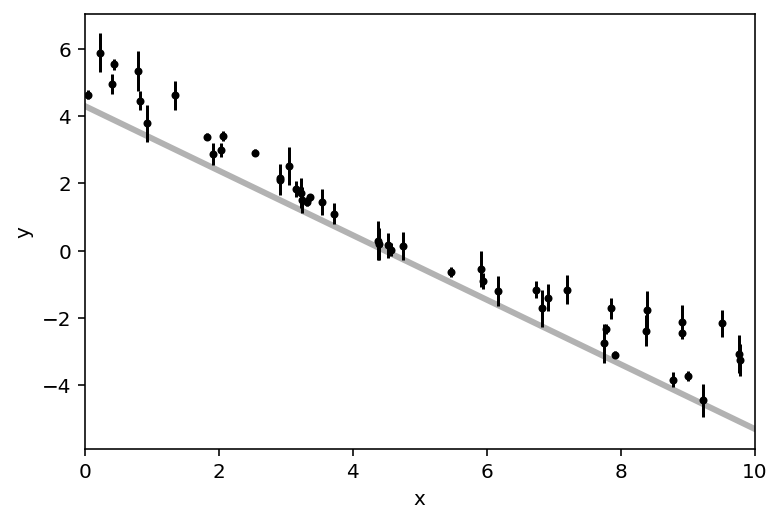

In [10]:
import numpy as np
import matplotlib.pyplot as plt

##choose the "true" parameters
m_true = -0.9594
b_true = 4.294
f_true = 0.534

## generate some syntetic data
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.rand(N)
y += yerr * np.random.rand(N)

plt.errorbar(x, y, yerr=yerr, fmt='.k', capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

Least-squares estimates:
m = -0.9572666362583035 +- 0.010652491488251065
b = 5.020588409891786 +- 0.05636598531749761


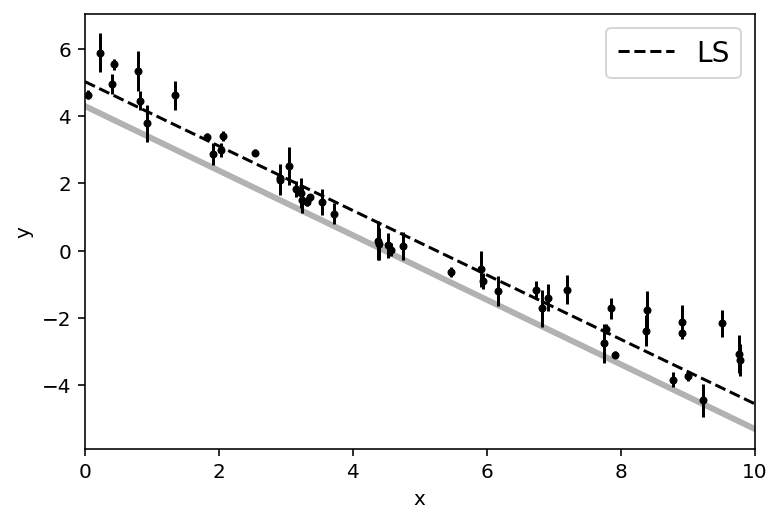

In [11]:
## this is the f(x)
A = np.vander(x, 2)
## this is the errors
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))

print("Least-squares estimates:")
print(f"m = {w[0]} +- {np.sqrt(cov[0,0])}")
print(f"b = {w[1]} +- {np.sqrt(cov[1,1])}")

plt.errorbar(x, y, yerr=yerr, fmt='.k', capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0,10)
plt.xlabel("x")
plt.ylabel("y");

Maximum likelihood estimates:
m = -0.9195932918986737
b = 4.665245800554191
f = 0.1912557887692346


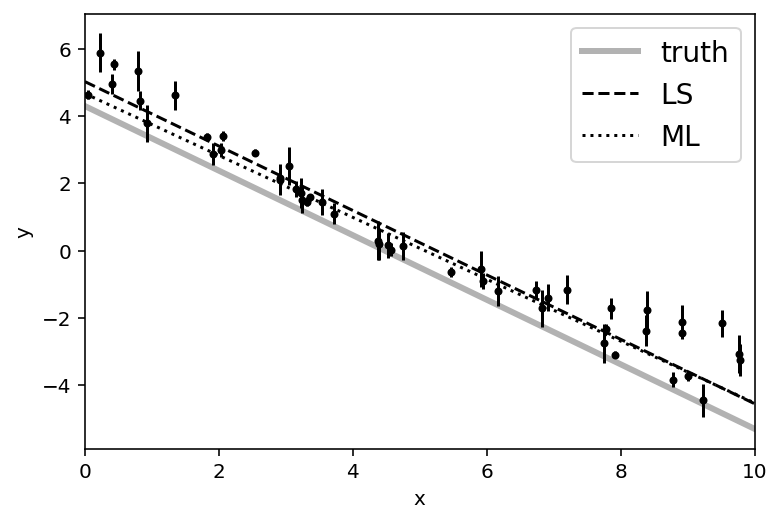

In [14]:
## maximum likelihood estimation
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2* log_f)
    return -0.5 * np.sum((y-model) ** 2 / sigma2 + np.log(sigma2))


from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.rand(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print(f"m = {m_ml}")
print(f"b = {b_ml}")
print(f"f = {np.exp(log_f_ml)}")

plt.errorbar(x, y, yerr=yerr, fmt='.k', capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0,10)
plt.xlabel("x")
plt.ylabel("y");

In [ ]:
## up next, using MCMC!!! but tommorow